In [1]:
import pandas as pd
import os

fichier = "data/sncf.csv"
if not os.path.exists(fichier):
    raise FileNotFoundError(f"Fichier introuvable : {fichier}")

df = pd.read_csv(fichier, sep=";", encoding="utf-8-sig", parse_dates=["Date"])

df.columns = df.columns.str.strip()
for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].str.strip()

df = df.rename(columns={"﻿Nom Gare": "Nom Gare"})

print("Données chargées et nettoyées.")
print(df.head())


Données chargées et nettoyées.
                                    Nom Gare  Code Gare Type jour       Date  \
0                                      ABLON   87545269       SAM 2025-08-02   
1  AEROPORT-CHARLES-DE-GAULLE-2-(TERMINAL-2)   87001479       JOB 2023-10-10   
2  AEROPORT-CHARLES-DE-GAULLE-1-(TERMINAL-3)   87271460       SAM 2019-03-16   
3  AEROPORT-CHARLES-DE-GAULLE-1-(TERMINAL-3)   87271460       DIM 2019-03-17   
4  AEROPORT-CHARLES-DE-GAULLE-2-(TERMINAL-2)   87001479       SAM 2019-03-23   

   Annee Ligne Axe Tranche horaire  Somme de Montants  
0   2025     C   C       Après 20h                118  
1   2023     B   B    De 16h à 20h               3868  
2   2019     B   B        Avant 6h                 82  
3   2019     B   B        Avant 6h                 70  
4   2019     B   B    De 16h à 20h               3376  


In [2]:
date_max = df["Date"].max()
date_limite = date_max - pd.DateOffset(months=6)
df_recent = df[df["Date"] >= date_limite]
df_ouvres = df_recent[df_recent["Type jour"] == "JOB"]

print(f"Période analysée : {date_limite.date()} → {date_max.date()}")
print(f"Nombre de lignes après filtre : {len(df_ouvres)}")


Période analysée : 2025-05-02 → 2025-11-02
Nombre de lignes après filtre : 386


In [3]:
top_10_gares = (
    df_ouvres.groupby("Nom Gare")["Somme de Montants"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

print("Top 10 gares par montant total :")
print(top_10_gares)


Top 10 gares par montant total :
Nom Gare
BIBLIOTHEQUE-FRANCOIS-MITTERRAND    52610
SAINT-MICHEL-NOTRE-DAME             51168
JUVISY                              37169
PARIS-AUSTERLITZ                    19976
CHOISY-LE-ROI                       18715
INVALIDES                           17199
CHAMP-DE-MARS-TOUR-EIFFEL           15657
BRETIGNY                            12177
ISSY-VAL-DE-SEINE                   11607
SAVIGNY-SUR-ORGE                    11420
Name: Somme de Montants, dtype: int64


In [4]:
df_top10 = df_ouvres[df_ouvres["Nom Gare"].isin(top_10_gares.index)]

trafic_horaire = (
    df_top10.groupby(["Nom Gare", "Tranche horaire"])["Somme de Montants"]
    .mean()
    .reset_index()
    .sort_values(["Nom Gare", "Somme de Montants"], ascending=[True, False])
)

print(trafic_horaire.head(20))


                            Nom Gare Tranche horaire  Somme de Montants
3   BIBLIOTHEQUE-FRANCOIS-MITTERRAND    De 16h à 20h            26353.0
2   BIBLIOTHEQUE-FRANCOIS-MITTERRAND    De 10h à 16h            10555.0
4   BIBLIOTHEQUE-FRANCOIS-MITTERRAND     De 6h à 10h             9614.0
0   BIBLIOTHEQUE-FRANCOIS-MITTERRAND       Après 20h             5727.0
1   BIBLIOTHEQUE-FRANCOIS-MITTERRAND        Avant 6h              361.0
8                           BRETIGNY     De 6h à 10h             5619.0
7                           BRETIGNY    De 16h à 20h             3369.0
6                           BRETIGNY    De 10h à 16h             2339.0
5                           BRETIGNY       Après 20h              850.0
12         CHAMP-DE-MARS-TOUR-EIFFEL    De 16h à 20h             6773.0
11         CHAMP-DE-MARS-TOUR-EIFFEL    De 10h à 16h             3853.0
13         CHAMP-DE-MARS-TOUR-EIFFEL     De 6h à 10h             3454.0
9          CHAMP-DE-MARS-TOUR-EIFFEL       Après 20h            

Matplotlib is building the font cache; this may take a moment.


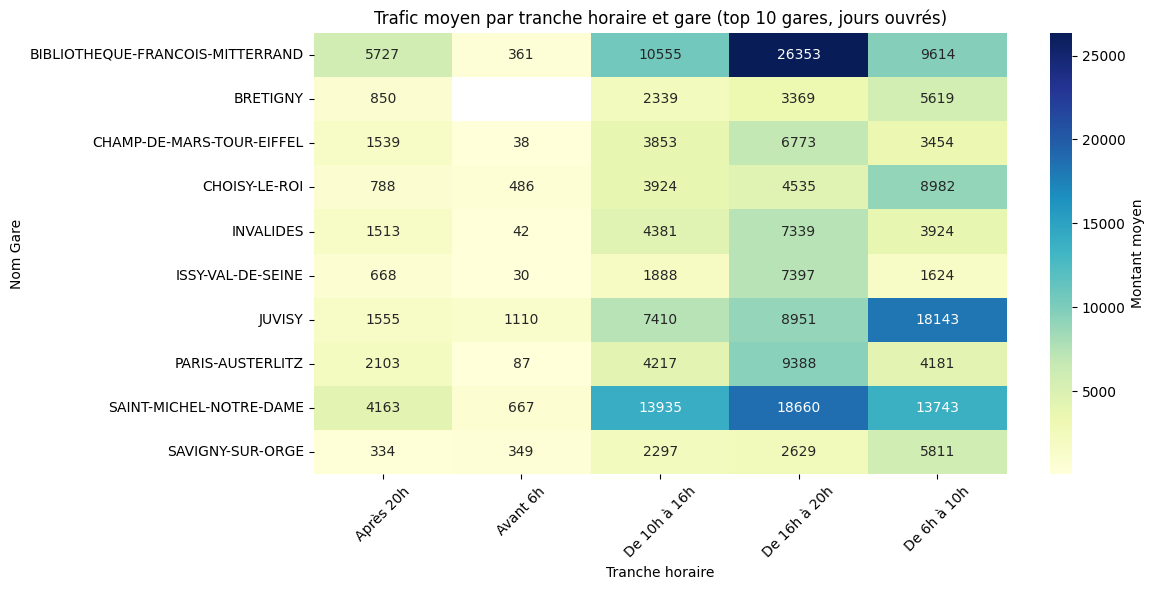

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

pivot_df = trafic_horaire.pivot(index="Nom Gare", columns="Tranche horaire", values="Somme de Montants")

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_df, annot=True, fmt=".0f", cmap="YlGnBu", cbar_kws={'label': 'Montant moyen'})
plt.title("Trafic moyen par tranche horaire et gare (top 10 gares, jours ouvrés)")
plt.ylabel("Nom Gare")
plt.xlabel("Tranche horaire")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Titre niveau 1
## Titre niveau 2
### Titre niveau 3

Texte normal, **gras**, *italique*, listes à puces :

- point 1
- point 2

Numérotation :

1. étape 1
2. étape 2

> Citation ou remarque importante

`code en ligne`

```python
# bloc de code
print("Hello world")



---

## 3. Exemple concret pour ton notebook

### Au début, ajoute une cellule Markdown avec :

```markdown
# Analyse des données SNCF - Phase 2

Ce notebook présente une analyse des montants par gare sur les jours ouvrés des 6 derniers mois.

## Étapes
- Chargement et nettoyage des données
- Filtrage sur les jours ouvrés récents
- Calcul du top 10 des gares par montant total
- Analyse par tranche horaire
- Visualisation heatmap
